In [1]:
# Practical 1
# We will start exploring how to use SVM to solve a 2-class classification problem.

In [17]:
## Import neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn import svm # "Support vector classifier"

In [18]:
def plot_svc_decision_function(X, Y, model, xlim = None, ylim = None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    
    if (xlim and ylim) is None:
        xlim = [min(X[:,0]), max(X[:, 0])]
        ylim = [min(X[:,1]), max(X[:, 1])]

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    yy, xx = np.meshgrid(y, x)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    
    #if more than 2 classes, just plot boundary, otherwise plot margin as well
    if len(model.classes_) > 2:
        Z = model.predict(xy)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    else:
        P = model.decision_function(xy).reshape(xx.shape)
        # plot decision boundary and margins
        plt.contour(xx, yy, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        plt.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='black');
        
    for yy in set(Y):
        plt.scatter(X[Y == yy, 0], X[Y == yy, 1], label = "Class " + str(yy))
    
    plt.legend(loc = 'best')
    
    plt.xlim(xlim)
    plt.ylim(ylim)

In [19]:
# generate an artificial data set, with 500 data points and 2 classes.

X, y = make_blobs(n_samples=200, centers=2, random_state=2, cluster_std=0.45)

In [20]:
# Looking at the first ten examples.
X[0:10]

array([[ 0.71780692, -1.45162026],
       [-0.96681287, -9.16763804],
       [ 1.37017666, -1.35280923],
       [ 1.36219786, -1.57755555],
       [-1.4491532 , -9.51498721],
       [ 0.48659286, -1.07372865],
       [-1.91856671, -9.59477372],
       [-0.61964685, -9.63253017],
       [ 1.41259887, -0.63280269],
       [-0.81523888, -9.62952646]])

In [21]:
y[0:10]

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

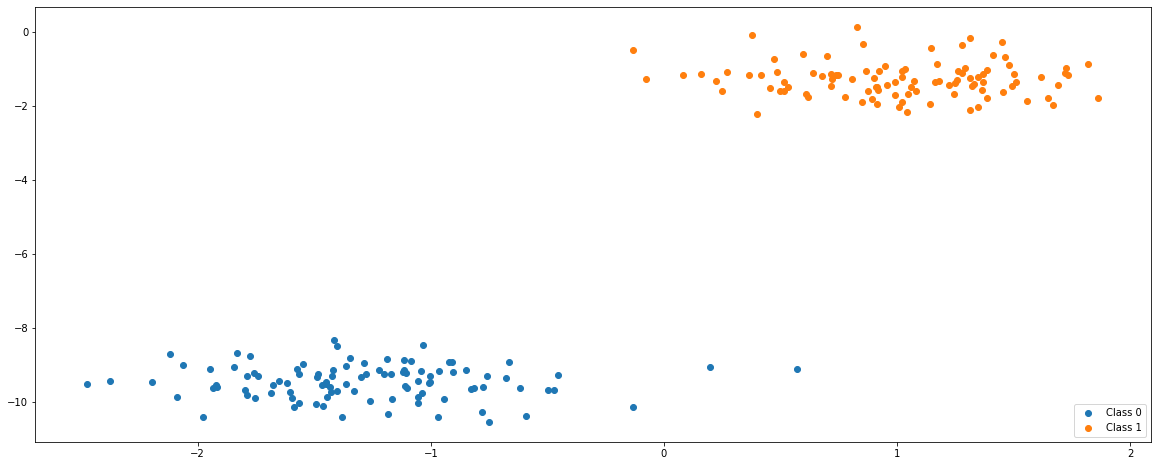

In [22]:
#Let's plot them
plt.scatter(X[y == 0, 0], X[y == 0, 1], label = "Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = "Class 1")
plt.legend(loc = 'lower right')

In [23]:
#From the plot you can see that we can see that this data set can be separated linearly. 
#We will use SVM linear to find the decision boundary.
#Create a SVM model with linear kernel and set gamma to auto
model_lr = svm.SVC(kernel = 'linear', gamma='auto')
model_lr.fit(X, y)  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
#Let's look at the support vector
model_lr.support_vectors_

array([[-1.41694085, -8.31809267],
       [ 0.40034429, -2.20506926]])

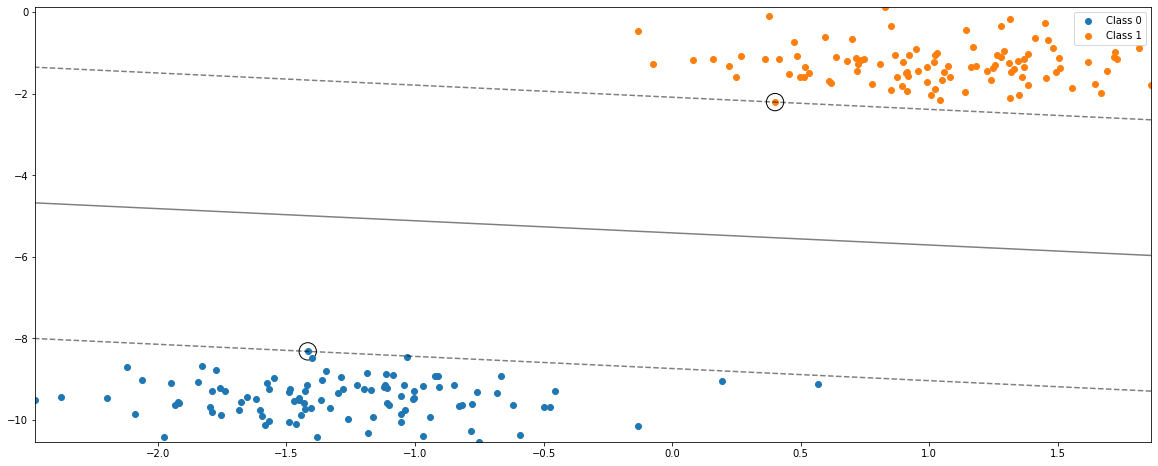

In [25]:
plot_svc_decision_function(X, y, model_lr, plot_support=True)

In [26]:
#Now let's use the RBF kernal
model_rbf = svm.SVC(kernel = 'rbf', gamma='auto')
model_rbf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
# Number of support vectors in RBF SVM
len(model_rbf.support_vectors_)

13

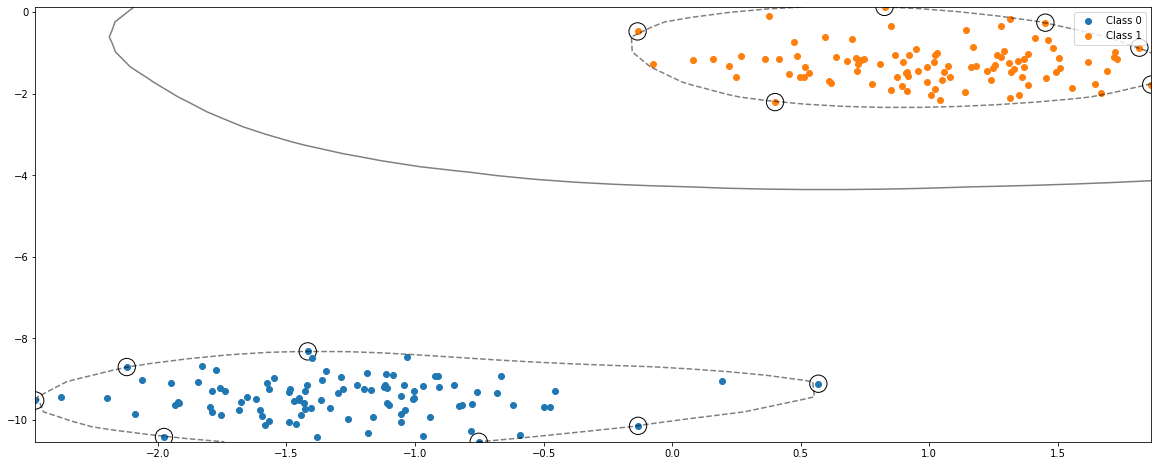

In [28]:
#plot the decision boundary
plot_svc_decision_function(X, y, model_rbf)
# ax = plt.gca()
# plt.xlim(-10,10)
# plt.ylim(-10,10)

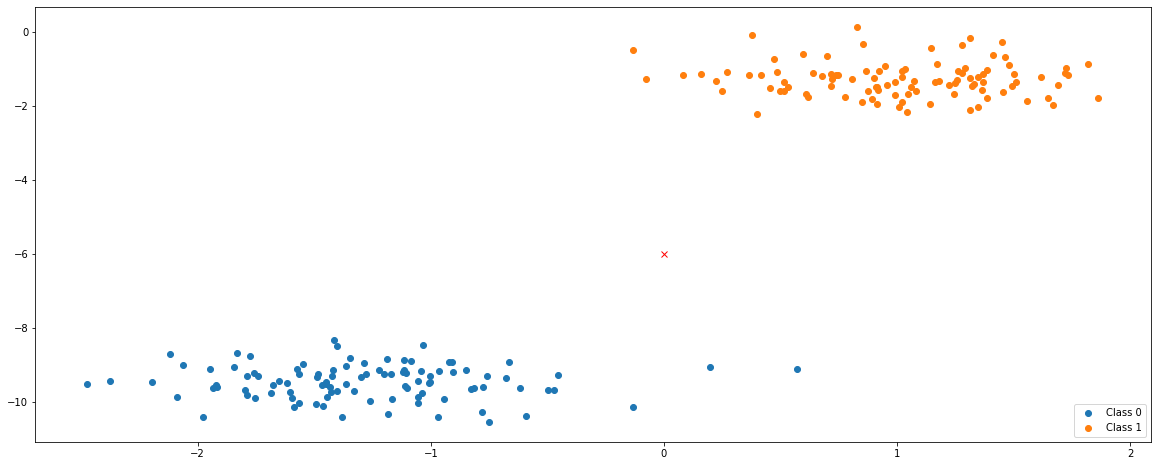

In [29]:
#Perform prediction


# What do you think the outcome will be given X = [0, -6]? Do you think SVM linear and SVM RBF will give 
# the same results? and why?
plt.scatter(X[y == 0, 0], X[y == 0, 1], label = "Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = "Class 1")
plt.legend(loc = 'lower right')
plt.plot(0, -6, marker = 'x', c = 'red')

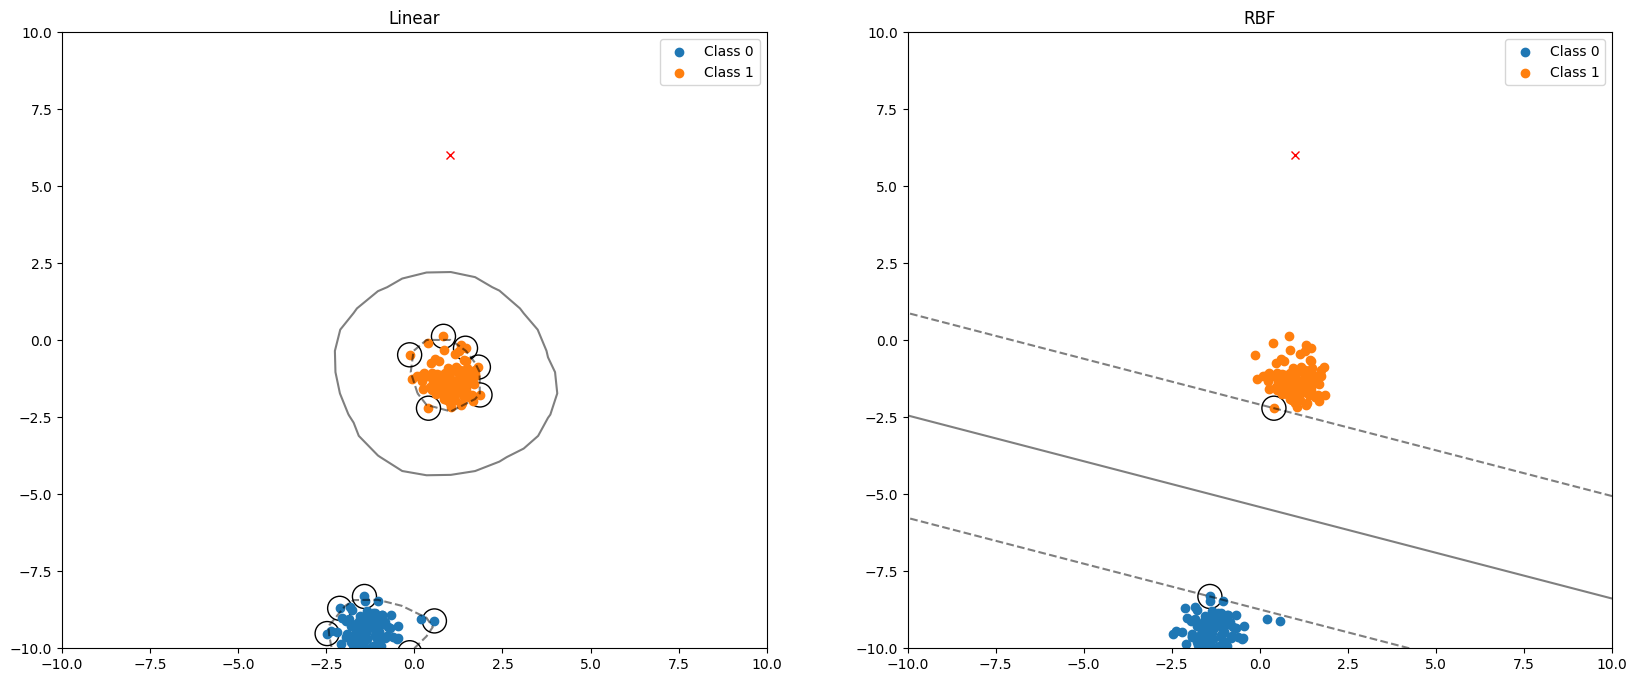

In [32]:
# Write a script to 
# 1) plot the point X = [0, -6] 
# 2) plot the decision boundary of the two models

plt.rcParams["figure.figsize"] = (20,8)
plt.subplot(1,2,1)
plot_svc_decision_function(X, y, model_rbf, xlim= [-10,10],ylim=[-10,10])
plt.plot(1, 6, marker = 'x', c = 'red')
plt.title("Linear")
plt.subplot(1,2,2)
plot_svc_decision_function(X, y, model_lr,xlim= [-10,10],ylim=[-10,10])
plt.plot(1, 6, marker = 'x', c = 'red')
plt.title("RBF")
plt.rcParams.update(plt.rcParamsDefault)

In [16]:
#Edit the code to generate the prediction given X = [0, -6]
#Hint: function predict() 
print("Given X = [1, 6] using linear SVM, the prediction is: %d" % (model_lr.predict([[0, -6]])))
print("Given X = [1, 6] using RBF-kernel SVM, the prediction is: %d" % (model_rbf.predict([[0, -6]])))

Given X = [1, 6] using linear SVM, the prediction is: 0
Given X = [1, 6] using RBF-kernel SVM, the prediction is: 0


In [17]:
# What do you think the outcome will be given X = [1, 6]? Do you think SVM linear and SVM RBF will give 
# the same results? and why?
# Plot the point [1, 6] on the two models.
print("Given X = [1, 6] using linear SVM, the prediction is: %d" % (model_lr.predict([[1, 6]])))
print("Given X = [1, 6] using RBF-kernel SVM, the prediction is: %d" % (model_rbf.predict([[1, 6]])))

Given X = [1, 6] using linear SVM, the prediction is: 1
Given X = [1, 6] using RBF-kernel SVM, the prediction is: 0


In [18]:
# Write the script to create SVM model using polynomial kernel (Hint: use 'poly' to specify the polynomial kernel).

model_poly = svm.SVC(kernel = 'poly', gamma='auto')
model_poly.fit(X, y)

# How many support vectors are there in Polynomial SVM?
len(model_poly.support_vectors_)
model_poly.support_vectors_

array([[-1.41694085, -8.31809267],
       [ 0.40034429, -2.20506926]])

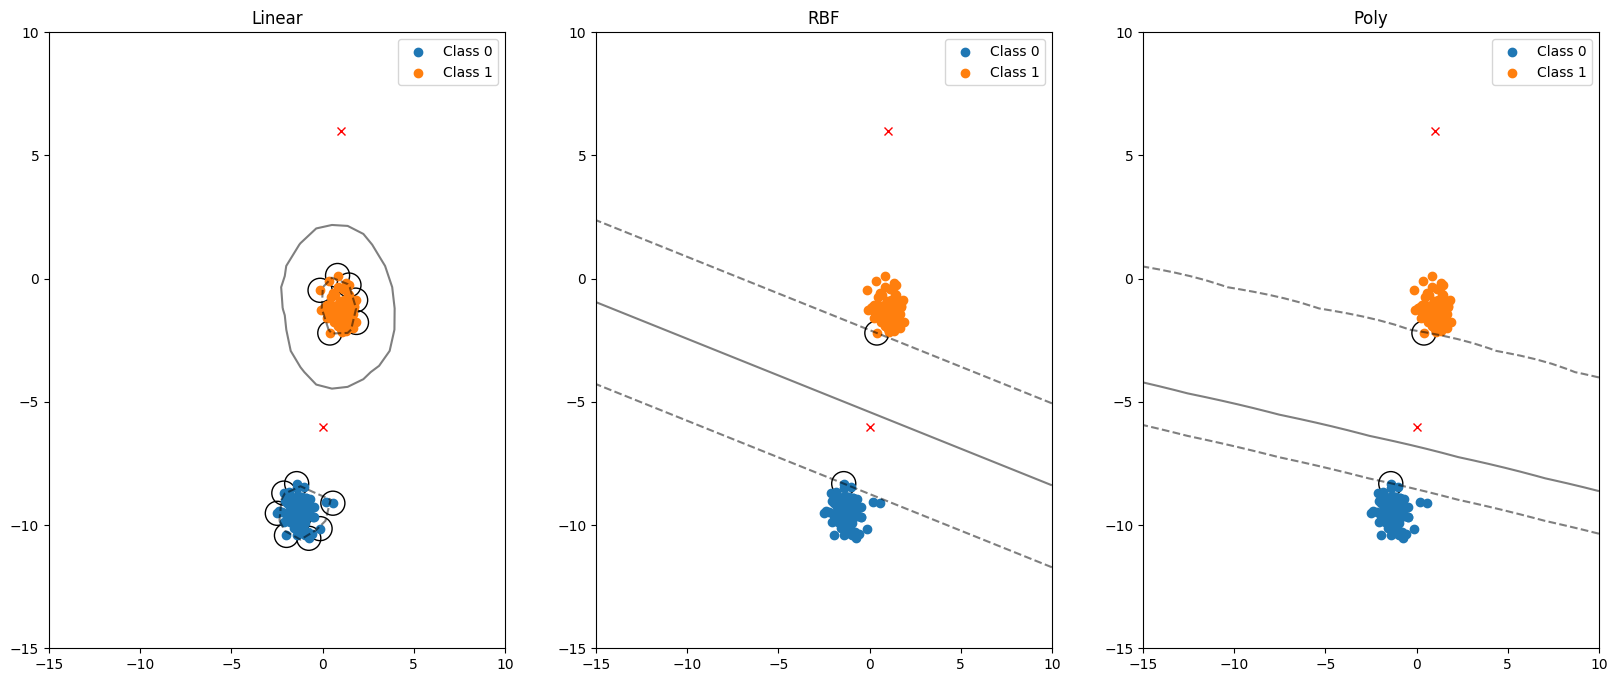

In [19]:
# Plot and compare the decision boundary between linear, RBF, and polynomial SVMs.
plt.rcParams["figure.figsize"] = (20,8)
plt.subplot(1,3,1)
plot_svc_decision_function(X, y, model_rbf, [-15,10], [-15,10])
plt.plot(0, -6, marker = 'x', c = 'red')
plt.plot(1, 6, marker = 'x', c = 'red')
plt.title("Linear")

plt.subplot(1,3,2)
plot_svc_decision_function(X, y, model_lr, [-15,10], [-15,10])
plt.plot(0, -6, marker = 'x', c = 'red')
plt.plot(1, 6, marker = 'x', c = 'red')
plt.title("RBF")

plt.subplot(1,3,3)
plot_svc_decision_function(X, y, model_poly, [-15,10], [-15,10])
plt.plot(0, -6, marker = 'x', c = 'red')
plt.plot(1, 6, marker = 'x', c = 'red')
plt.title("Poly")

plt.rcParams.update(plt.rcParamsDefault)

In [20]:
# What do you think will be the outcomes of X = [[0,-6], [1,6]] using polynomial SVM?
print("Given X = [1, 6] using linear SVM, the prediction is: %d" % (model_poly.predict([[1, 6]])))
print("Given X = [1, 6] using RBF-kernel SVM, the prediction is: %d" % (model_poly.predict([[1, 6]])))

Given X = [1, 6] using linear SVM, the prediction is: 1
Given X = [1, 6] using RBF-kernel SVM, the prediction is: 1
